### Drawing and Calculating Binomial Trees

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def StockTree(n, S, K, r, sigma, T,u,d):  
    dt = T/n 
    #u = np.exp(sigma*np.sqrt(dt))
    #d = 1./u
    p = (np.exp(r*dt)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    return stockvalue


def Binomial(n, S, K, r, sigma, t, PutCall,type='E'):  
    dt = t/n 
    u =  np.exp(sigma*np.sqrt(dt))
    d =  1./u
    p = (np.exp(r*dt)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price    
    for i in range(n-1,-1,-1):
        if type == 'E':
            for j in range(i+1):
                    if PutCall=="P":
                        optionvalue[i,j] = np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])
                    elif PutCall=="C":
                        optionvalue[i,j] = np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])
        if type == 'A':
            for j in range(i+1):
                    if PutCall=="P":
                        optionvalue[i,j] = max(0, K-stockvalue[i,j], np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
                    elif PutCall=="C":
                        optionvalue[i,j] = max(0, stockvalue[i,j]-K, np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))    
    return optionvalue

In [4]:
    # Inputs
n = 4 #input("Enter number of binomial steps: ")           #number of steps
S = 50 #input("Enter the initial underlying asset price: ") #initial underlying asset price
r = 0.05 #input("Enter the risk-free interest rate: ")        #risk-free interest rate
K = 51 #input("Enter the option strike price: ")            #strike price
sigma = 0.2 #input("Enter the volatility factor: ")              #volatility
T = 0.25
type = 'E'
u=1.06
d=0.95

In [9]:
if type =='E':
        Type = 'European'
if type == 'A':
        Type = 'American'
callval=Binomial(n, S, K, r, sigma, T, PutCall="C")[0,0]
print (Type + " Call Price: %s" %(callval))
putval=Binomial(n, S, K, r, sigma, T, PutCall="P")[0,0]
print (Type + " Put Price: %s" %(putval))

European Call Price: 1.850705614084823
European Put Price: 2.2171734392727926


In [10]:
# The BS Prices are calculated by a formula

def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    Parameters
    ==========
    S0 : float           initial stock/index level
    K : float            strike price
    T : float            maturity date (in year fractions)
    r : float            constant risk-free short rate
    sigma : float        volatility factor in diffusion term
    Returns
    =======
    value : float         present value of the European call option
    '''
    from math import log, sqrt, exp
    from scipy import stats
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    # stats.norm.cdf --> cumulative distribution function
    # for normal distribution
    return value

In [11]:
print ('BS '+ Type + " Call Price: %s" %(bsm_call_value(S, K, T, r, sigma)))

BS European Call Price: 1.8232827621223926


In [12]:
putprice=bsm_call_value(S, K, T, r, sigma)-S+np.exp(-r*T)*K
print ('BS '+ Type + " Put Price: %s" %(putprice))

BS European Put Price: 2.1897505873103427


### Calculation and Plotting Using the Binomial Model

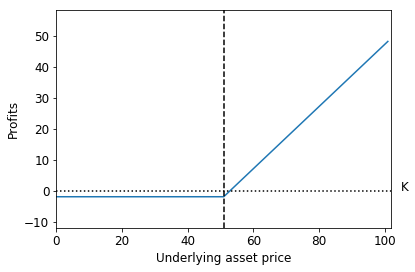

European Call Price: 1.8254605169407243


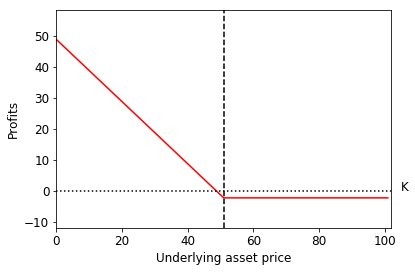

European Put Price: 2.1919283421285174


In [14]:
n=200
y = [-Binomial(n, S, K, r, sigma, T, "C")[0,0]] * (K)
y += [x - Binomial(n, S, K, r, sigma, T, "C")[0,0] for x in range(K)] 

plt.plot(range(2*K), y)
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title='American Call Option'
plt.text(105, 0, 'K')
plt.show()

if type =='E':
        Type = 'European'
if type == 'A':
        Type = 'American'
callval=Binomial(n, S, K, r, sigma, T, PutCall="C")[0,0]
print (Type + " Call Price: %s" %(callval))

z = [-x + K - Binomial(n, S, K, r, sigma, T, "P")[0,0] for x in range(K)] 
z += [-Binomial(n, S, K, r, sigma, T, "P")[0,0]] * (K)

plt.figure()
plt.title='American Put Option'
plt.plot(range(2*K), z, color='red')
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')

plt.text(105, 0, 'K')
plt.show()
'''
_, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
plt.subplots_adjust(wspace=0.4)
ax1.plot(range(2*K), y)
ax1.axis([0, 2*K, min(y) - 10, max(y) + 10])
ax1.set_title('American Call Option')
ax1.set_xlabel('Underlying asset price1')
ax1.set_ylabel('Profits')
ax1.axvline(x=K, linestyle='--', color='black')
ax1.axhline(y=0, linestyle=':', color='black')
ax1.set_text(105, 0, 'K')
ax2.plot(range(2*K), z, color='red') 
ax2.set_axis([0, 2*K, min(y) - 10, max(y) + 10])
ax2.set_title='American Put Option'
ax2.set_xlabel('Underlying asset price2')
ax2.set_ylabel('Profits')
ax2.axvline(x=K, linestyle='--', color='black')
ax2.axhline(y=0, linestyle=':', color='black')
ax2.set_text(105, 0, 'K')
plt.show()
'''
putval=Binomial(n, S, K, r, sigma, T, PutCall="P")[0,0]
print (Type + " Put Price: %s" %(putval))
    

## Drawing Binomial Trees

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams["font.size"] = 12

nodes0=['0.0']    #['0.0\n 2']
nodes1=['1.0','1.1']
nodes2=['2.0','2.1','2.2']
nodes3=['3.0','3.1','3.2','3.3']
nodes4=['4.0','4.1','4.2','4.3','4.4']
fontsize=8
nsteps=4

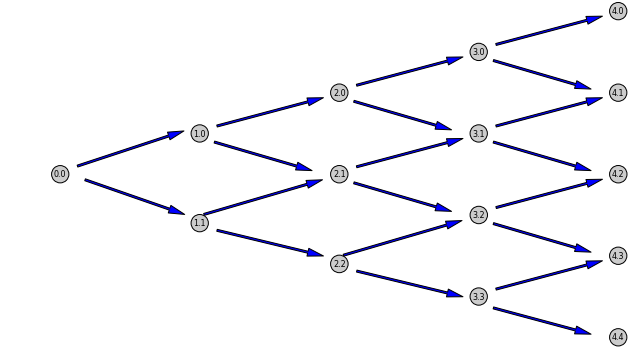

In [16]:
def drawtree(nodes0,nodes1,nodes2,nodes3,nodes4,fontsize=12,nsteps=4):
    ''' nsteps is the (number of columns of the tree) - 1, nsteps>=0'''
    
    mpl.rcParams["font.size"] = fontsize
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(0,5), ylim=(-4,4))

    arprops=dict(facecolor='b',width=2.0,shrink=0.075,headwidth=8,headlength=16)
    arprops1=dict(facecolor='b',width=2.0,shrink=0.15,headwidth=8,headlength=16)
    box=dict(boxstyle="circle", fc="0.8")
    
    
    i=0
    if i<=nsteps:
        plt.annotate(nodes0[0],xy=(0.6,0.8), xytext=(0.1,0.5), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(0.6,0.25), xytext=(0.18,0.5), arrowprops=arprops,xycoords='axes fraction')

    i=i+1
    if i<=nsteps:
        plt.annotate(nodes1[0],xy=(1.1,1.0), xytext=(0.6,0.75), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(1.1,0.5), xytext=(0.6,0.75), arrowprops=arprops1,xycoords='axes fraction')
        plt.annotate('',xy=(1.1,0.5), xytext=(0.6,0.25), arrowprops=arprops,xycoords='axes fraction')
        plt.annotate(nodes1[1],xy=(1.1,0.0), xytext=(0.6,0.20), arrowprops=arprops,xycoords='axes fraction',bbox=box)

    i=i+1
    if i<=nsteps:
        plt.annotate(nodes2[0],xy=(1.6,1.25), xytext=(1.1,1.0), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(1.6,0.75), xytext=(1.1,1.0), arrowprops=arprops1,xycoords='axes fraction')
        plt.annotate(nodes2[1],xy=(1.6,0.75), xytext=(1.1,0.5),arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(1.6,0.25), xytext=(1.1,0.5), arrowprops=arprops1,xycoords='axes fraction')
        plt.annotate('',xy=(1.6,0.25), xytext=(1.1,0.0), arrowprops=arprops,xycoords='axes fraction')
        plt.annotate(nodes2[2],xy=(1.6,-0.25), xytext=(1.1,-0.05), arrowprops=arprops,xycoords='axes fraction',bbox=box)

    i=i+1
    if i<=nsteps:
        plt.annotate(nodes3[0],xy=(2.1,1.5), xytext=(1.6,1.25), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(2.1,1.0), xytext=(1.6,1.25), arrowprops=arprops1,xycoords='axes fraction')
        plt.annotate(nodes3[1],xy=(2.1,1.0), xytext=(1.6,0.75), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(2.1,0.5), xytext=(1.6,0.75), arrowprops=arprops1,xycoords='axes fraction')
        plt.annotate(nodes3[2],xy=(2.1,0.5), xytext=(1.6,0.25), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(2.1,0.0), xytext=(1.6,0.25), arrowprops=arprops1,xycoords='axes fraction')
        plt.annotate(nodes3[3],xy=(2.1,0.0), xytext=(1.6,-0.25), arrowprops=arprops,xycoords='axes fraction',bbox=box)
        plt.annotate('',xy=(2.1,-0.5), xytext=(1.6,-0.27), arrowprops=arprops1,xycoords='axes fraction')
        

   
    i=i+1
    if i<=nsteps:
        plt.annotate(nodes4[0],xy=(2.1,1.5),xycoords='axes fraction',bbox=box)
        plt.annotate(nodes4[1],xy=(2.1,1.0),xycoords='axes fraction',bbox=box)
        plt.annotate(nodes4[2],xy=(2.1,0.5),xycoords='axes fraction',bbox=box)
        plt.annotate(nodes4[3],xy=(2.1,0.0),xycoords='axes fraction',bbox=box)
        plt.annotate(nodes4[4],xy=(2.1,-0.5),xycoords='axes fraction',bbox=box)

    plt.axis('off')
    plt.title='Binomial Tree'
    plt.show()
    
drawtree(nodes0,nodes1,nodes2,nodes3,nodes4,fontsize,nsteps=4)

### Complexity of our Algorithms Using These Trees
If the are 4 steps then the number of nodes is 1+2+3+4+5=15.  
If there are $n$ steps then there are $\frac{(n+1)(n+2)}{2}$ nodes.  
In our algorithm each node is processed a number of time bounded by some fixed constant independent of $n$. Hence there is a constant $C$ such that 
$${\rm Number\ of\ Algorithm\ Steps}\le Cn^2$$
The complexity is said to be quadratic which is quite manageable by computer. If each node had 2 children which are not the children of other nodes then there would be exponentially many nodes as a function of $n$. Such trees are called *bushy* and can only be used for very small $n$ (there are about $2^{n+1}$ nodes). If $n=100$ then $n^2=10,000$ which computers can handle in a short time, while $2^{100}$ is a number which may be something like the number of protons in the universe.

In [17]:
stocktree=StockTree(n, S, K, r, sigma, T,u,d)

In [18]:
nodes0=np.round(stocktree[0],2)
nodes1=np.round(stocktree[1],2)
nodes2=np.round(stocktree[2],2)
nodes3=np.round(stocktree[3],2)
nodes4=np.round(stocktree[4],2)

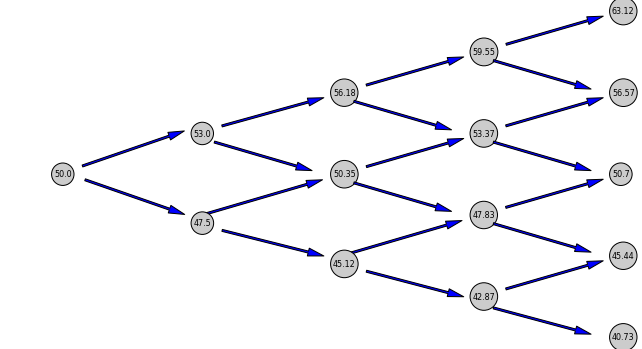

In [19]:
drawtree(nodes0,nodes1,nodes2,nodes3,nodes4,fontsize,nsteps)

In [20]:
type='E'
optiontree=Binomial(n, S, K, r, sigma, T, PutCall="C",type=type)

In [21]:
nodes0=np.round(optiontree[0],2)
nodes1=np.round(optiontree[1],2)
nodes2=np.round(optiontree[2],2)
nodes3=np.round(optiontree[3],2)
nodes4=np.round(optiontree[4],2)

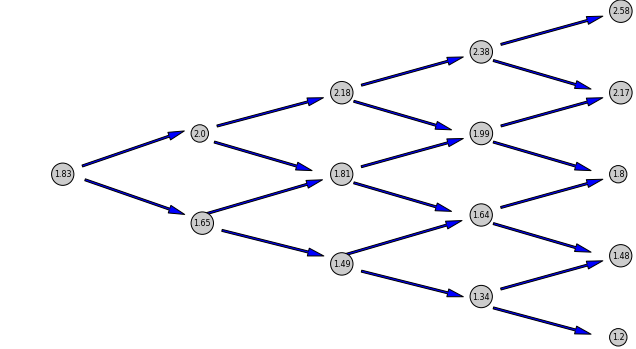

In [22]:
drawtree(nodes0,nodes1,nodes2,nodes3,nodes4,fontsize,nsteps)

## Calculating by Hand

In [ ]:
import numpy as np
sigma=0.15
dt=0.25
u=1.1                        # np.exp(sigma*np.sqrt(dt))
d=0.9
r=0.12
p=(np.exp(r*dt)-d)/(u-d)
K=42

sigma_loc=(1/np.sqrt(dt))*np.sqrt(p*(1-p))*(u-d)

print('sigma = ',sigma,',','dt = ',np.round(dt,4),'\n','u = ',np.round(u,4),',','d = ',np.round(d,4),'\n',  
      'r = ',r,',','p = ',np.round(p,4),'\n','K = ',K,',','sigma_loc = ',np.round(sigma_loc,4),'\n')


def g(S):
    return u*S,d*S
def f(up,down):
    return np.exp(-r*dt)*(p*up+(1-p)*down)
def payoff(up,down):
    return max(K-up,0),max(K-down,0)


S=40
up,down=0.8099,6
price=f(up,down)


print(g(S)[0],g(S)[1])
print(payoff(up,down)[0
                     ],payoff(up,down)[1])
print(price)


### Exercises
1. A stock price is currently R40. It is known that at the end of one month it will be either
R42 or R38. The risk-free interest rate is 8% per annum with continuous compounding.
What is the value of a one-month European call option with a strike price of R39?  

2. Explain the no-arbitrage and risk-neutral valuation approaches to valuing a European
option using a one-step binomial tree.

3. What is meant by the delta of a stock option?

4. A stock price is currently R50. It is known that at the end of six months it will be either R45
or R55. The risk-free interest rate is 10% per annum with continuous compounding. What
is the value of a six-month European put option with a strike price of R50?

5. A stock price is currently R100. Over each of the next two six-month periods it is
expected to go up by 10% or down by 10%. The risk-free interest rate is 8% per annum
with continuous compounding. What is the value of a one-year European call option
with a strike price of R100?

6. For the situation considered in Problem 5, what is the value of a one-year European
put option with a strike price of R100? Verify that the European call and European Put
prices satisfy put-call parity.

7. What are the formulas for u and d in terms of volatility?

8. Consider the situation in which stock price movements during the life of a European
option are governed by a two-step binomial tree. Explain why it is not possible to set
up a position in the stock and the option that remains riskless for the whole of the life
of the option.

9. A stock price is currently R50. It is known that at the end of two months it will be either
R53 or R48. The risk-free interest rate is 10% per annum with continuous compounding.
What is the value of a two-month European call option with a strike price of R49?

10. A stock price is currently R80. It is known that at the end of four months it will be either
R75 or R85. The risk-free interest rate is 5% per annum with continuous compounding.
What is the value of a four-month European put option with a strike price of R80? 

11. A stock price is currently R40. It is known that at the end of three months it will be either
R45 or R35. The risk-free rate of interest with quarterly compounding is 8% per annum.
Calculate the value of a three-month European put option on the stock with an exercise
price of R40. 

12. A stock price is currently R50. Over each of the next two three-month periods it is
expected to go up by 6% or down by 5%. The risk-free interest rate is 5% per annum
with continuous compounding. What is the value of a six-month European call option
with a strike price of R51?

13. For the situation considered in Problem 12, what is the value of a six-month
European put option with a strike price of R51? Verify that the European call and
European put prices satisfy put-call parity. If the put option were American, would it
ever be optimal to exercise it early at any of the nodes on the tree?

14. A stock price is currently R25. It is known that at the end of two months it will be either
R23 or R27. The risk-free interest rate is 10% per annum with continuous compounding.
Suppose $S_T$ is the stock price at the end of two months. What is the value of a derivative
that pays off ,q at this time?

15. Calculate u, d, and p when a binomial tree is constructed to value an option on a foreign
currency. The tree step size is one month, the domestic interest rate is 5% per annum, the
foreign interest rate is 8% per annum, and the volatility is 12% per annum.

16. A stock price is currently R50. It is known that at the end of six months it will be either
R60 or R42. The risk-free rate of interest with continuous compounding is 12% per
annum. Calculate the value of a six-month European call option on the stock with an
exercise price of R48. 

17. A stock price is currently R40. Over each of the next two three-month periods it is
expected to be up by 10% or down by 10%. The risk-free interest rate is 12% per annum
with continuous compounding.
a. What is the value of a six-month European put option with a strike price of R42?
b. What is the value of a six-month American put option with a strike price of R42?

18. Using a "trial-and-error" approach, estimate how high the strike price has to be in
Problem 17 for it to be optimal to exercise the put option immediately.

19. A stock price is currently R30. During each two-month period for the next four months it
will increase by 8% or decrease by 10%. The risk-free interest rate is 5%. Use a two-step
tree to calculate the value of a derivative that pays off $[max(30 - S_T , 0)]^2 $, where $S_T$ is the
stock price in four months. If the derivative is American style, should it be exercised
early?

20. Consider a European call option on a non-dividend-paying stock where the stock price is
R40, the strike price is R40, the risk-free rate is 4% per annum, the volatility is 30% per
annum, and the time to maturity is six months.
a. Calculate u, d, and p for a two-step tree:
b. Value the option using a two-step tree.
c. Verify that the program in this notebook gives the same answer.
d. Use the program in this notebook to value the option with 5, 50, 100, and 500 time steps.

21. Repeat Problem 20 for an American put option on a futures contract. The strike price
and the futures price are R50, the risk-free rate is 10%, the time to maturity is six
months, and the volatility is 40% per annum.

Do:   
4,12,13,17,19,20